In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=190a86aae0c8726b9b9cf8a2c58ad77598297e842f2ca7f78721100d453664b5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=2437a12857851972b2d93fa4e766236af72b2b532a758d2421b2e31461a0d4fe
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 182, in wrapper
    return func(self, options, args)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 323, in run
    requirement_set = resolver.resolve(
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 183, in resolve
    discovered_reqs.extend(self._resolve_one(requirement_set, req))
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 388, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 351, in _get_abstract_dist_for
    req.ch

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras # 에러남 keras 깔아야...
import sklearn

# 일일히 graph의 font size 지정할 필요 없이 sea born의 font_scale 사용
plt.style.use('seaborn')
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [48]:
df_train = pd.read_csv('C:/Users/Admin/pbl_ml/Trial/조별과제/data02/train.csv')

In [49]:
df_train.shape
df_train.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

In [50]:
df_train.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [51]:
df_train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [52]:
# 결측치 확인
df_train.isnull().sum() / df_train.shape[0]

inst_id               0.000000
OC                    0.000000
sido                  0.000000
sgg                   0.000000
openDate              0.000000
bedCount              0.016611
instkind              0.003322
revenue1              0.026578
salescost1            0.026578
sga1                  0.026578
salary1               0.026578
noi1                  0.026578
noe1                  0.026578
interest1             0.026578
ctax1                 0.026578
profit1               0.026578
liquidAsset1          0.026578
quickAsset1           0.026578
receivableS1          0.026578
inventoryAsset1       0.026578
nonCAsset1            0.026578
tanAsset1             0.026578
OnonCAsset1           0.026578
receivableL1          0.026578
debt1                 0.026578
liquidLiabilities1    0.026578
shortLoan1            0.026578
NCLiabilities1        0.026578
longLoan1             0.026578
netAsset1             0.026578
surplus1              0.026578
revenue2              0.026578
salescos

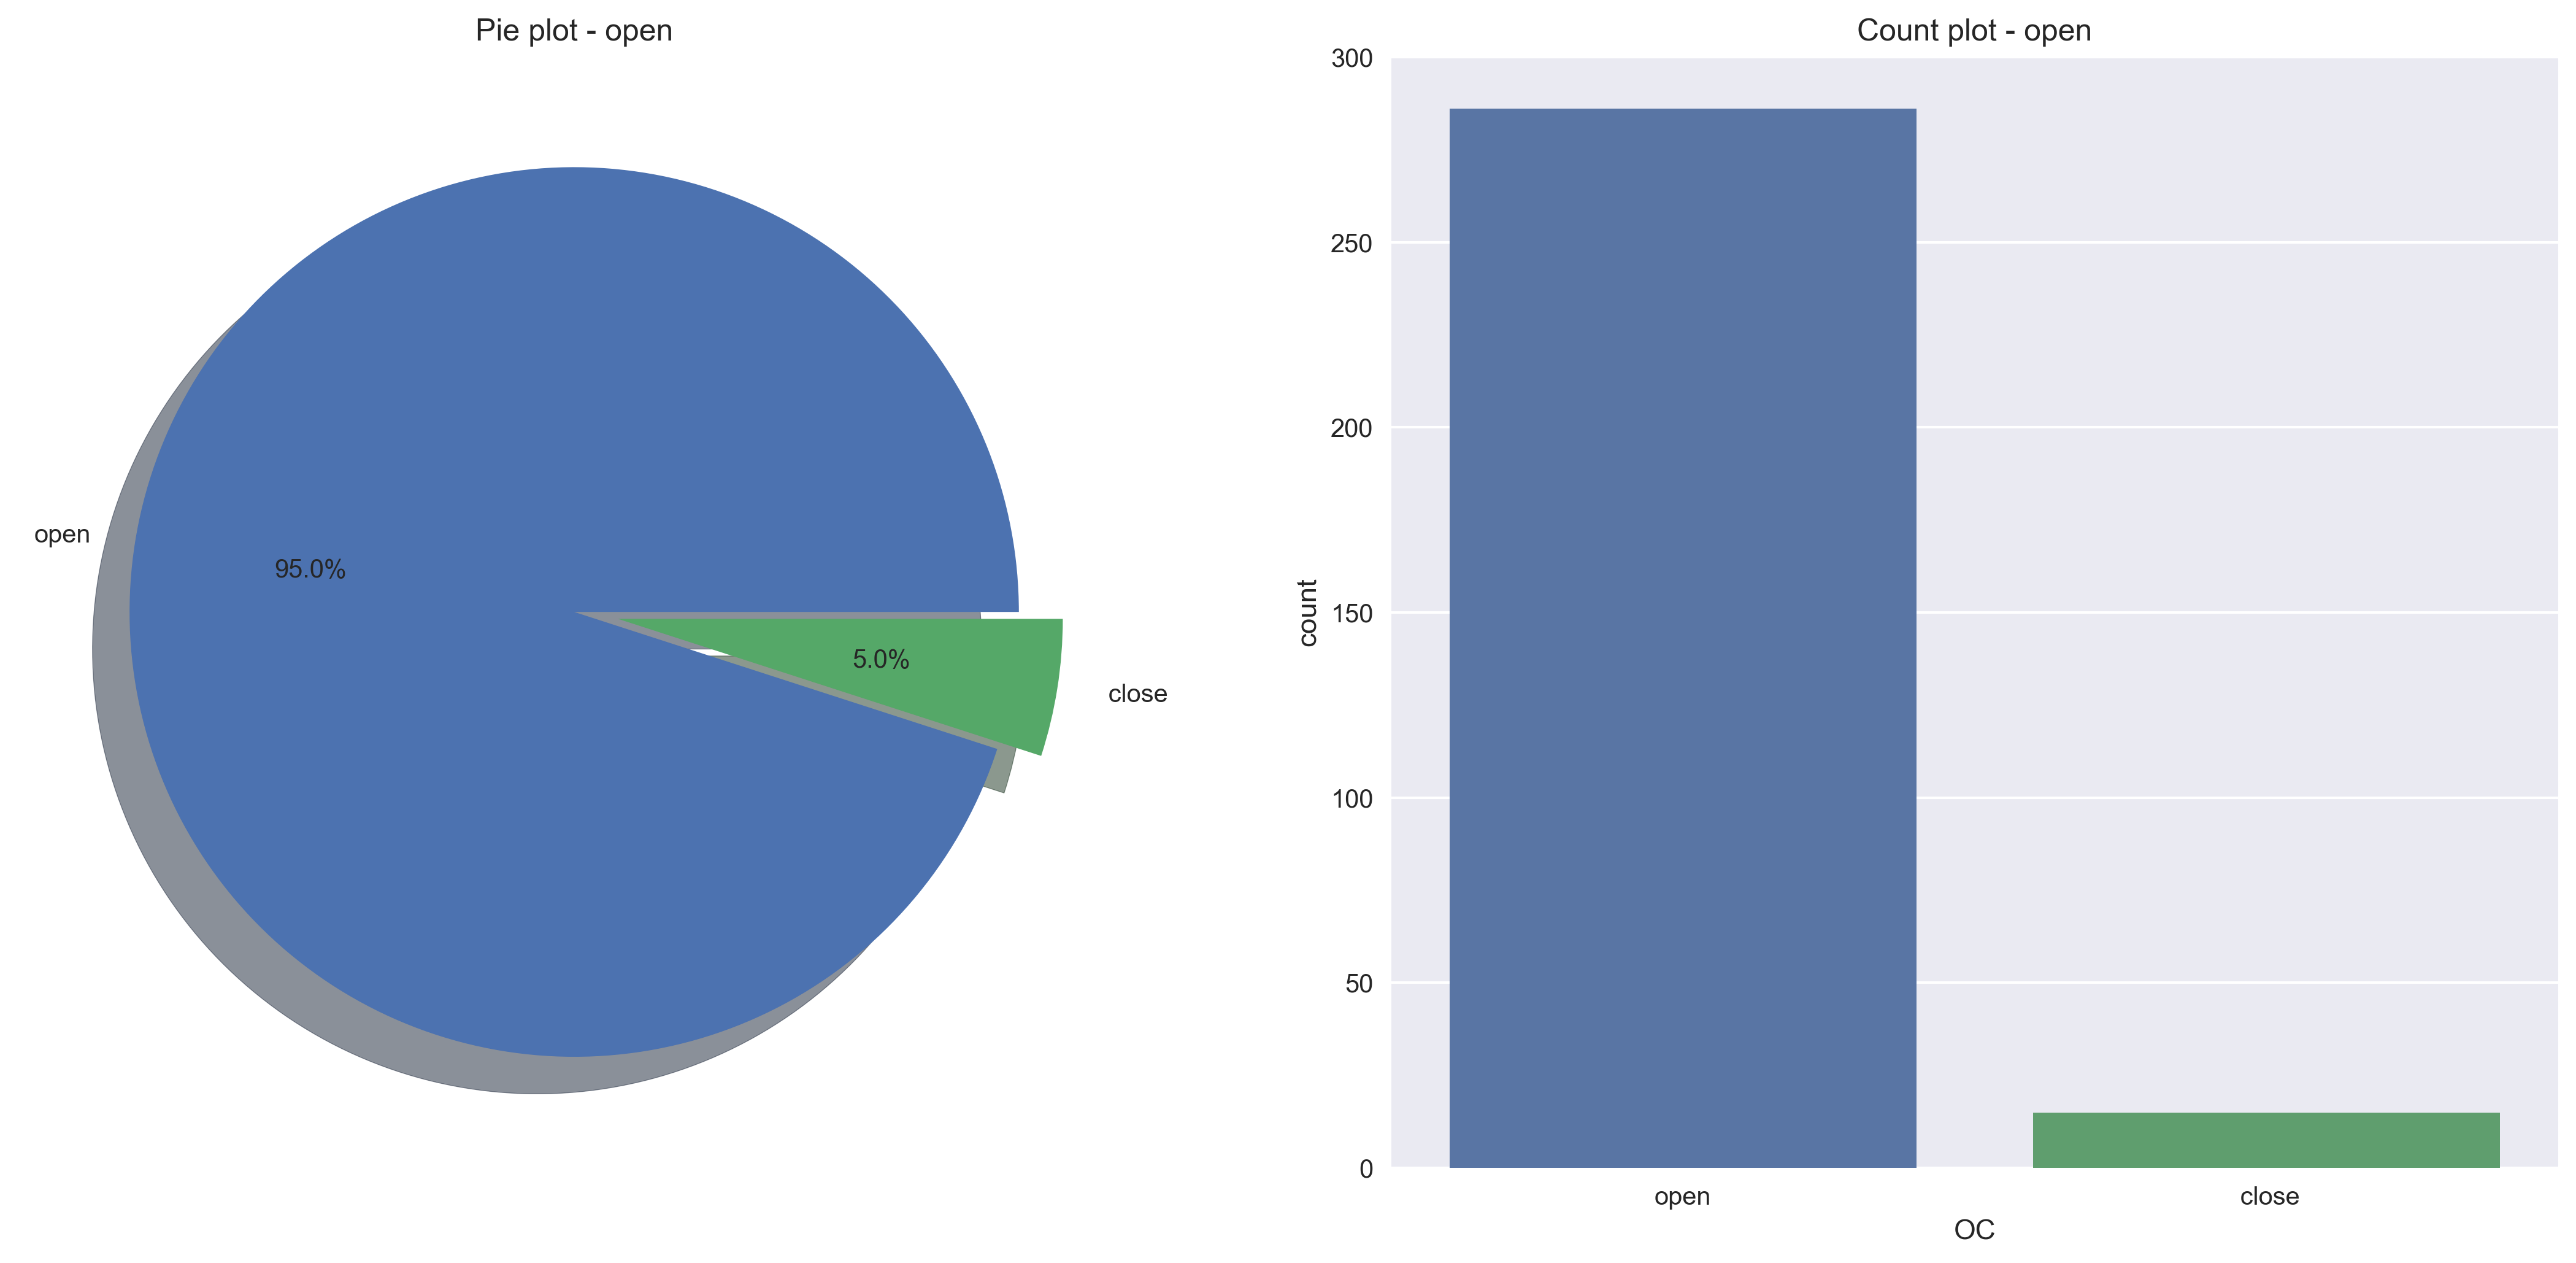

In [53]:
# Target Label, OC 확인
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['OC'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - open')
ax[0].set_ylabel('')
sns.countplot('OC', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - open')

plt.rcParams["figure.dpi"] = 300
plt.show()

In [54]:
# instkind그룹 별 데이터 카운트
df_train[['instkind', 'OC']].groupby(['instkind'], as_index=True).count()

,OC
instkind,
clinic,18
dental_clinic,1
general_hospital,37
hospital,88
nursing_hospital,144
traditional_clinic,4
traditional_hospital,8


In [55]:
pd.crosstab(df_train['instkind'], df_train['OC'], margins=True)

OC,close,open,All
instkind,,,
clinic,1,17,18
dental_clinic,0,1,1
general_hospital,1,36,37
hospital,5,83,88
nursing_hospital,5,139,144
traditional_clinic,1,3,4
traditional_hospital,1,7,8
All,14,286,300


In [84]:
import numpy as np

def outliers_iqr(data):
    q1, q3 =np.percentile(data, [25,75])
    #넘파이의 값을 퍼센트로 표시해주는 함수
    iqr = q3 -q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    mask = np.where((data > upper_bound)|(data < lower_bound))
    
    return mask

In [57]:
import pandas as pd  #pandas 이용
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/Admin/pbl_ml/Trial/조별과제/train.csv') # pandas를 이용해 csv데이터 불러오기
selectdata = pd.DataFrame(data, columns=["inst_id", "OC", "instkind", "revenue1", "Profit1", "debt1", "liquidLiabilities1", "revenue2", "profit2", "Debt2", "liquidLiabilities2"])
selectdata

,inst_id,OC,instkind,revenue1,Profit1,debt1,liquidLiabilities1,revenue2,profit2,Debt2,liquidLiabilities2
0,1,open,nursing_hospital,4.217530e+09,NaN,6.828260e+08,2.013237e+08,4.297848e+09,2.078297e+08,NaN,2.228769e+08
1,3,open,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,open,nursing_hospital,1.004522e+09,NaN,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,NaN,0.000000e+00
3,7,open,general_hospital,7.250734e+10,NaN,4.236380e+10,2.799188e+10,6.685834e+10,8.383875e+08,NaN,1.701860e+10
4,9,open,general_hospital,4.904354e+10,NaN,4.989811e+10,2.890919e+10,4.808280e+10,3.264258e+07,NaN,3.007259e+10
...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,nursing_hospital,7.614697e+09,NaN,8.715369e+09,1.520004e+09,7.068816e+09,-2.624151e+08,NaN,2.618201e+09
297,423,close,hospital,6.717144e+09,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
298,426,close,hospital,0.000000e+00,NaN,6.249466e+09,2.050342e+09,3.132198e+09,-1.518272e+08,NaN,2.170973e+09
299,427,close,nursing_hospital,2.116892e+09,NaN,5.804268e+08,7.507060e+09,4.096872e+09,-2.729675e+09,NaN,6.400000e+09


In [101]:
## 특정 값과 일치하는 데이터 필터링하기(참고: https://hogni.tistory.com/9)

# selectdata의 OC컬럼 선택
# 컬럼의 값과 조건을 비교
# 그 결과를 새로운 변수에 할당
contains_close = selectdata['OC'].str.contains("close")

# 조건을 충족하는 데이터를 필터링하여 새로운 변수에 저장
close_train = selectdata[contains_close]

# 결과를 출력
print(close_train)
print()

     inst_id      OC              instkind      revenue1  Profit1  \
35        58   close      nursing_hospital  2.681766e+09      NaN   
71       107   close  traditional_hospital  4.131858e+09      NaN   
93       140   close              hospital  5.423357e+09      NaN   
111      164   close      nursing_hospital  2.179021e+09      NaN   
141      209   close              hospital  8.845472e+09      NaN   
158      238   close              hospital  3.581089e+09      NaN   
177      265   close      nursing_hospital  1.683125e+10      NaN   
193      281   close                   NaN  3.054388e+08      NaN   
212      306   close      nursing_hospital  2.233031e+10      NaN   
214      309   close                clinic  9.125255e+08      NaN   
261      366   close    traditional_clinic  7.162790e+09      NaN   
290      414   close      general_hospital  2.375764e+09      NaN   
297      423   close              hospital  6.717144e+09      NaN   
298      426   close              

array([<AxesSubplot:title={'center':'Profit1'}, xlabel='OC'>,
       <AxesSubplot:title={'center':'profit2'}, xlabel='OC'>],
      dtype=object)

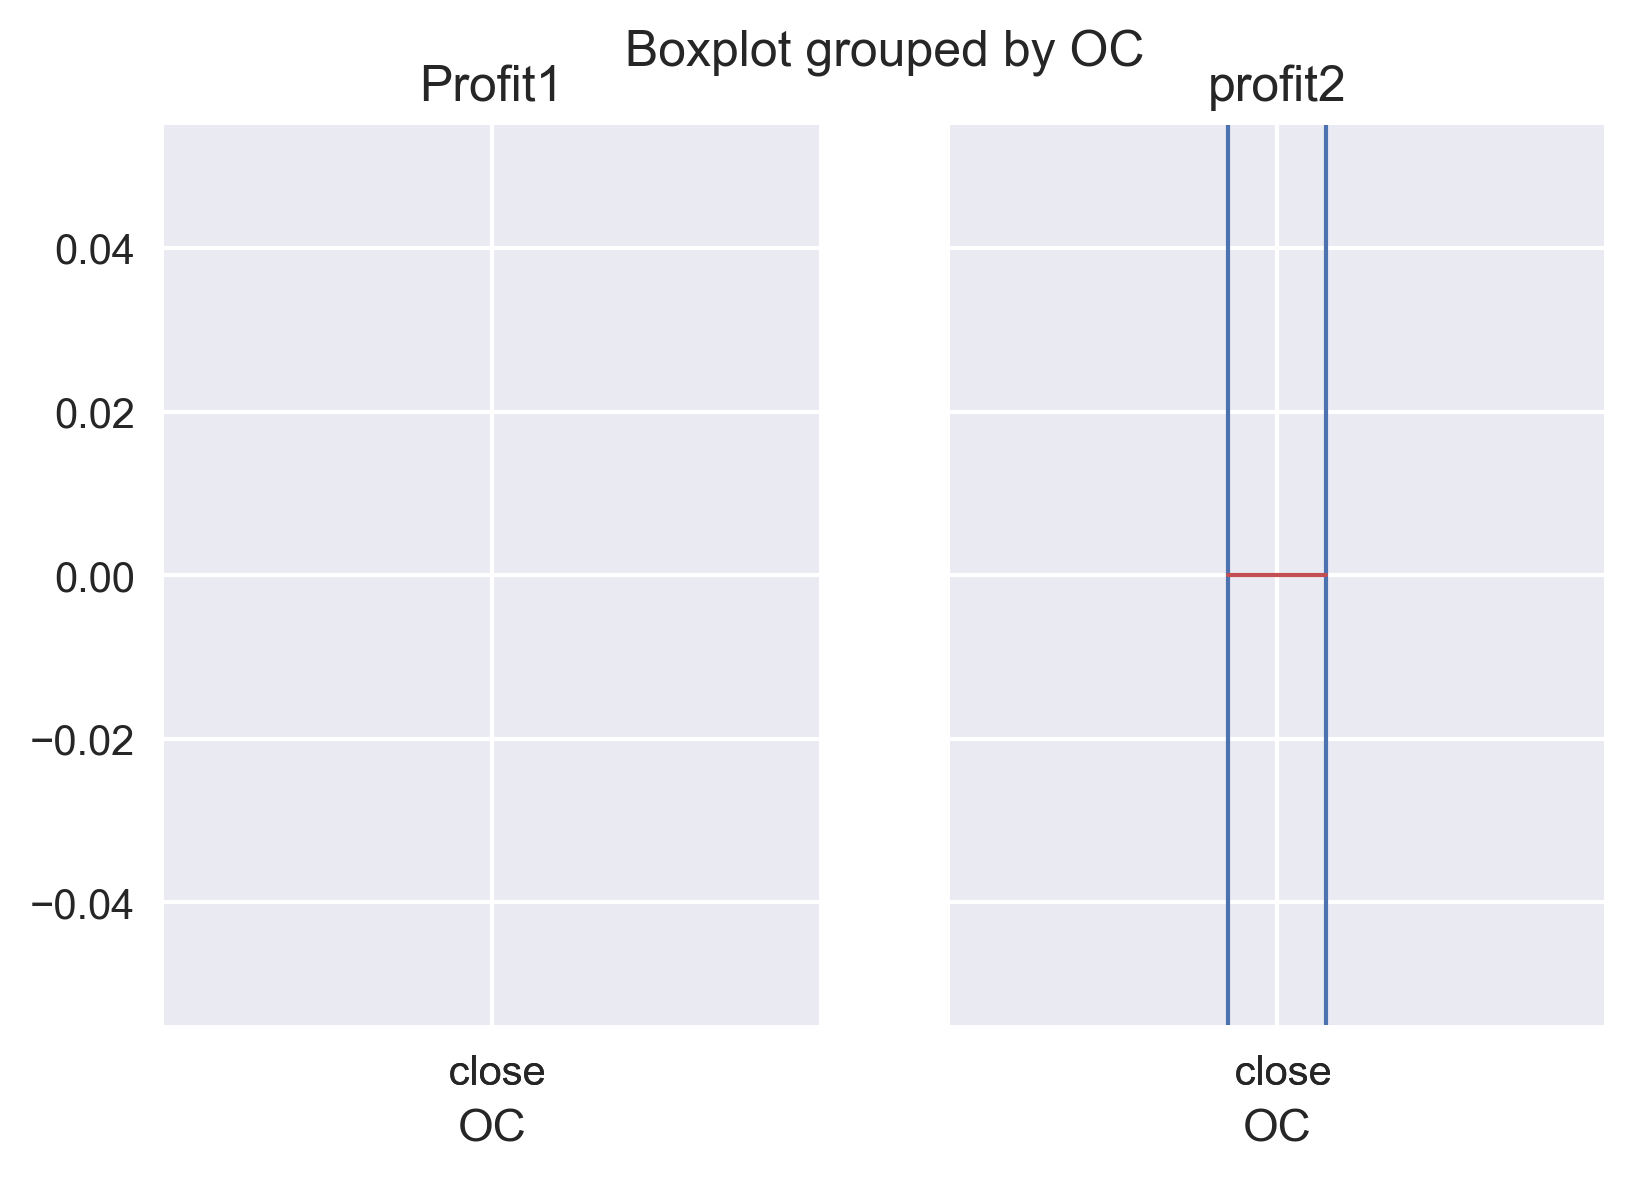

In [173]:
# profit1, profit2에 대한 boxplot
close_train.boxplot(column=('Profit1','profit2'), by='OC')

In [172]:
close_train

,inst_id,OC,instkind,revenue1,Profit1,debt1,liquidLiabilities1,revenue2,profit2,Debt2,liquidLiabilities2
35,58,close,nursing_hospital,2.681766e+09,NaN,0.000000e+00,0.000000e+00,2.093132e+09,7.353718e+07,NaN,0.000000e+00
71,107,close,traditional_hospital,4.131858e+09,NaN,2.803885e+09,2.793826e+09,3.318141e+09,7.211579e+07,NaN,2.632717e+09
93,140,close,hospital,5.423357e+09,NaN,4.457667e+09,1.864667e+09,5.073663e+09,-1.023856e+07,NaN,1.406195e+08
111,164,close,nursing_hospital,2.179021e+09,NaN,1.249684e+10,5.800804e+09,0.000000e+00,0.000000e+00,NaN,0.000000e+00
141,209,close,hospital,8.845472e+09,NaN,6.655088e+09,2.733884e+09,8.826799e+09,-2.665958e+09,NaN,1.001811e+10
158,238,close,hospital,3.581089e+09,NaN,5.121516e+09,1.692526e+09,2.761941e+09,4.385311e+06,NaN,2.031396e+09
177,265,close,nursing_hospital,1.683125e+10,NaN,9.194518e+09,1.642488e+09,1.403887e+10,3.464353e+08,NaN,1.682877e+09
193,281,close,NaN,3.054388e+08,NaN,0.000000e+00,0.000000e+00,5.342966e+08,-4.237396e+08,NaN,0.000000e+00
212,306,close,nursing_hospital,2.233031e+10,NaN,1.582736e+10,1.285973e+10,2.239509e+10,1.846078e+09,NaN,1.288180e+10
214,309,close,clinic,9.125255e+08,NaN,1.006269e+09,2.874159e+08,9.425389e+08,-7.516312e+07,NaN,3.075474e+08


In [174]:
# 시그마 클리핑 연산(참고: https://haloaround.tistory.com/274)
quartiles = np.percentile(close_train['profit2'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2]-quartiles[0])  

In [177]:
#close_train의 profit2의 이상치값
quartiles

array([-2.87783410e+08,  0.00000000e+00,  3.82505495e+07])

In [178]:
#위의 연산을 close_train(close 상점만 있는 data)에 적용해 이상치가 제거된 close_train1을 얻음
close_train1 = close_train.query('(profit2 > @mu -5*@sig) & (profit2 < @mu + 5*@sig)')

In [179]:
# profit2에 대해 이상치를 제거한 close상점들에 대한 data
close_train1

,inst_id,OC,instkind,revenue1,Profit1,debt1,liquidLiabilities1,revenue2,profit2,Debt2,liquidLiabilities2
35,58,close,nursing_hospital,2.681766e+09,NaN,0.000000e+00,0.000000e+00,2.093132e+09,73537185.0,NaN,0.000000e+00
71,107,close,traditional_hospital,4.131858e+09,NaN,2.803885e+09,2.793826e+09,3.318141e+09,72115788.0,NaN,2.632717e+09
93,140,close,hospital,5.423357e+09,NaN,4.457667e+09,1.864667e+09,5.073663e+09,-10238565.0,NaN,1.406195e+08
111,164,close,nursing_hospital,2.179021e+09,NaN,1.249684e+10,5.800804e+09,0.000000e+00,0.0,NaN,0.000000e+00
158,238,close,hospital,3.581089e+09,NaN,5.121516e+09,1.692526e+09,2.761941e+09,4385311.0,NaN,2.031396e+09
177,265,close,nursing_hospital,1.683125e+10,NaN,9.194518e+09,1.642488e+09,1.403887e+10,346435298.0,NaN,1.682877e+09
193,281,close,NaN,3.054388e+08,NaN,0.000000e+00,0.000000e+00,5.342966e+08,-423739612.0,NaN,0.000000e+00
214,309,close,clinic,9.125255e+08,NaN,1.006269e+09,2.874159e+08,9.425389e+08,-75163117.0,NaN,3.075474e+08
290,414,close,general_hospital,2.375764e+09,NaN,1.215538e+10,5.555377e+09,0.000000e+00,0.0,NaN,0.000000e+00
297,423,close,hospital,6.717144e+09,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00


## - 아래는 실패 -

In [47]:
## 실패...
close = [] # 폐업한 병원의 정보들을 저장할 리스트 생성

for row in selectdata :
    try:
        if row[1] == 'open':
            for i in range(0, len(selectdata)):
                close.append(row[i]) # 폐업한 병원의 정보들 저장
    except:
        pass

In [146]:
import csv
f= open('train.csv')
data = csv.reader(f)
next(data)
open_id = []
open_profit1 = []
close_id = [] # 폐업한 병원들을 저장할 리스트 생성
close_profit1 = []

for row in data :
    try:
        if row[1] == 'open':  
            open_id.append(row[0]) #병원 id 추가
            open_profit1.append(float(row[15])) # profit1 값 추가
        else :
            close_id.append(row[0])
            close_profit1.append(float(row[15]))
    except:
        pass

In [147]:
print(close_profit1)
CP1 = close_profit1

[118187869.0, 265363383.0, 94650011.0, 184402245.0, 1552612305.0, 5236575.0, 1955182603.0, -261130839.0, 1692203641.0, -180467241.0, 663703963.0, -2483310603.0, -1622521056.0, -71753078.0, -1850554348.0]


In [148]:
def find_outlier(data):
    
    q1, q3 = np.percentile(data, [25, 75])
    
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    mask = np.where((data > upper_bound) | (data < lower_bound))
    
    return mask

In [157]:
mask = find_outlier(CP1)[0]
mask

array([ 4,  6,  8, 11, 12, 14], dtype=int64)

In [153]:
for i in range(0, len(mask)):
    mask[i] = int(mask[i])

In [160]:
CP1[mask]

TypeError: only integer scalar arrays can be converted to a scalar index

In [119]:
print(close_profit1)

[118187869.0, 265363383.0, 94650011.0, 184402245.0, 1552612305.0, 5236575.0, 1955182603.0, -261130839.0, 1692203641.0, -180467241.0, 663703963.0, -2483310603.0, -1622521056.0, -71753078.0, -1850554348.0]


In [126]:
pip install math

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [122]:
import math

In [125]:
log_data = [math.log(x) for x in CP1]

ValueError: math domain error